In [26]:
import random
import pandas as pd
import json
from datetime import datetime
import requests
#import openweathermpay.core as owm
from config import weather_key
from citipy import citipy
import time
import matplotlib.pyplot as plt

In [27]:
# generate random 500 latitude and longitude

#random latitude
latitude = []
for i in range(500):
    latitude.append(random.uniform(-90,90))
    
#random longitude
longitude = []
for i in range(500):
    longitude.append(random.uniform(-180,180))

#create dataframe to storage data
latitude_longitude = pd.DataFrame({'Latitude':latitude,'Longitude':longitude})    

#add blank columns
# latitude_longitude['City']=''
# latitude_longitude['Country']=''
# latitude_longitude['Latitude1']=''
# latitude_longitude['Longitude1']=''
# latitude_longitude['Date']=''
# latitude_longitude['Max_Temperature']=''
# latitude_longitude['Humidity']=''
# latitude_longitude['Cloudiness']=''
# latitude_longitude['Wind_Spend']=''

#display
latitude_longitude.head()

,Latitude,Longitude
0,-79.094725,31.244975
1,14.846080,160.237089
2,57.339952,-68.680921
3,-29.555738,-159.818855
4,46.856734,-52.705261


In [28]:
#find city of that Lat & Long
for index, row in latitude_longitude.iterrows():  
    city = citipy.nearest_city(row['Latitude'],row['Longitude'])
    latitude_longitude.loc[index,'City'] = city.city_name
    latitude_longitude.loc[index,'Country'] = city.country_code
    
    
#display    
latitude_longitude.head()

,Latitude,Longitude,City,Country
0,-79.094725,31.244975,port elizabeth,za
1,14.846080,160.237089,butaritari,ki
2,57.339952,-68.680921,iqaluit,ca
3,-29.555738,-159.818855,avarua,ck
4,46.856734,-52.705261,torbay,ca


In [29]:
#base url
url = "http://api.openweathermap.org/data/2.5/weather?"

count = 0


#use for in loop to get url 
for index, row in latitude_longitude.iterrows(): 
#     count +=1
#     if count > 20:
#         break
        
    #get city for each row
    city = row['City']
    
    #get url
    query_url = url + "appid=" + weather_key + "&q=" + city 
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    time.sleep(1)
 
    #print url
    print('Processing record ' + str(index) + ' | ' + city)
    print(query_url)

    #extract info from each url
    try:
        latitude_longitude.loc[index,'Date'] = weather_json['dt']
        latitude_longitude.loc[index,'Max_Temperature'] = weather_json['main']['temp_max']
        latitude_longitude.loc[index,'Humidity'] = weather_json['main']['humidity']
        latitude_longitude.loc[index,'Cloudiness'] = weather_json['clouds']['all']
        latitude_longitude.loc[index,'Wind_Spend'] = weather_json['wind']['speed']
        latitude_longitude.loc[index,'Longitude1'] = weather_json['coord']['lon']
        latitude_longitude.loc[index,'Latitude1'] = weather_json['coord']['lat']
        
    except(KeyError,IndexError):
        print('Missing value... skipping.')

Processing record 0 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=port elizabeth
Processing record 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=butaritari
Processing record 2 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=iqaluit
Processing record 3 | avarua
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=avarua
Processing record 4 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=torbay
Processing record 5 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=ushuaia
Processing record 6 | esperance
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=esperance
Processing record 7 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a0

Processing record 62 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=busselton
Processing record 63 | yinchuan
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=yinchuan
Processing record 64 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=punta arenas
Processing record 65 | dingle
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=dingle
Processing record 66 | lebu
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=lebu
Processing record 67 | santa lucia
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=santa lucia
Processing record 68 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=tuktoyaktuk
Processing record 69 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=F35

Processing record 124 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=bredasdorp
Processing record 125 | karratha
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=karratha
Processing record 126 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=ushuaia
Processing record 127 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=mar del plata
Processing record 128 | san francisco
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=san francisco
Processing record 129 | ahipara
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=ahipara
Processing record 130 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=butaritari
Processing record 131 | jamestown
http://api.openweathermap.org/da

Processing record 186 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=hermanus
Processing record 187 | mananjary
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=mananjary
Processing record 188 | port alfred
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=port alfred
Processing record 189 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=atuona
Processing record 190 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=georgetown
Processing record 191 | chichigalpa
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=chichigalpa
Processing record 192 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=qaanaaq
Processing record 193 | rikitea
http://api.openweathermap.org/data/2.5/weather

Processing record 249 | east london
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=east london
Processing record 250 | avarua
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=avarua
Processing record 251 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=mahebourg
Processing record 252 | aranos
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=aranos
Processing record 253 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=mataura
Processing record 254 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=thompson
Processing record 255 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=vaini
Processing record 256 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=F353b2

Processing record 310 | oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=oranjemund
Processing record 311 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=vestmannaeyjar
Processing record 312 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=rikitea
Processing record 313 | yabrud
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=yabrud
Processing record 314 | yulara
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=yulara
Processing record 315 | fomboni
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=fomboni
Processing record 316 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=punta arenas
Processing record 317 | mataura
http://api.openweathermap.org/data/2.5/weather

Processing record 372 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=punta arenas
Processing record 373 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=busselton
Processing record 374 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=punta arenas
Processing record 375 | akyab
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=akyab
Missing value... skipping.
Processing record 376 | corn island
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=corn island
Processing record 377 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=new norfolk
Processing record 378 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=hermanus
Processing record 379 | hilo
http://api

Processing record 433 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=khatanga
Processing record 434 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=vaini
Processing record 435 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=busselton
Processing record 436 | nanning
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=nanning
Processing record 437 | cody
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=cody
Processing record 438 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=bluff
Processing record 439 | airai
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=airai
Processing record 440 | samusu
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5

Processing record 495 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=lavrentiya
Processing record 496 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=tuktoyaktuk
Processing record 497 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=cabo san lucas
Processing record 498 | taihe
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=taihe
Processing record 499 | safonovo
http://api.openweathermap.org/data/2.5/weather?appid=F353b26a3fe38270a05875bd6af78bc5&q=safonovo


In [30]:
# conver temperature from f to k
latitude_longitude['Max_Temperature'] = (latitude_longitude['Max_Temperature']-273.15) * 1.8 + 32
#dislay dataframe that we created
latitude_longitude.head()

,Latitude,Longitude,City,Country,Date,Max_Temperature,Humidity,Cloudiness,Wind_Spend,Longitude1,Latitude1
0,-79.094725,31.244975,port elizabeth,za,1.561822e+09,91.004,58.0,1.0,3.60,-74.98,39.31
1,14.846080,160.237089,butaritari,ki,1.561822e+09,83.399,67.0,98.0,0.36,172.79,3.07
2,57.339952,-68.680921,iqaluit,ca,1.561822e+09,50.000,71.0,20.0,3.60,-68.52,63.75
3,-29.555738,-159.818855,avarua,ck,1.561822e+09,66.200,77.0,1.0,4.60,-159.78,-21.21
4,46.856734,-52.705261,torbay,ca,1.561822e+09,64.004,87.0,75.0,3.60,-52.73,47.66


In [31]:
#get today date
date_now = datetime.today().strftime('%m/%d/%y')

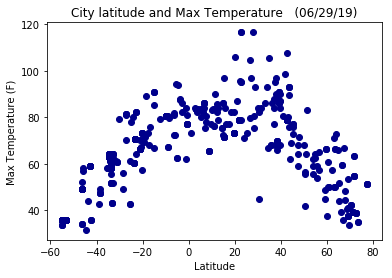

In [32]:
#Latitude and temperature 

# define x, y axis
x_axis = latitude_longitude['Latitude1']
y_axis = latitude_longitude['Max_Temperature']
now = datetime.now()
title = 'City latitude and Max Temperature   ('+ date_now+")"

#plot
plt.scatter(x_axis, y_axis, c='darkblue')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
#plt.title('City latitude and Max Temperature')
plt.title(title )
#plt.grid(c='white')

plt.show()

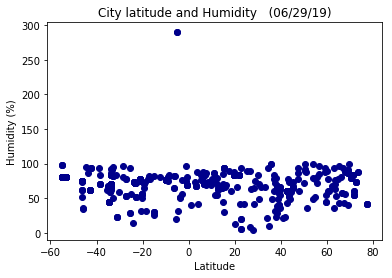

In [33]:
#Latitude and Humidity 

# define x, y axis
x_axis = latitude_longitude['Latitude1']
y_axis = latitude_longitude['Humidity']
now = datetime.now()
title = 'City latitude and Humidity   ('+ date_now+")"

#plot
plt.scatter(x_axis, y_axis, c='darkblue')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#plt.title('City latitude and Max Temperature')
plt.title(title )
#plt.grid(c='white')

plt.show()

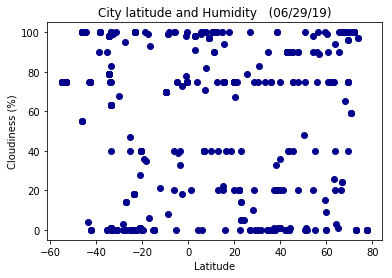

In [34]:
#Latitude and Cloudiness 

# define x, y axis
x_axis = latitude_longitude['Latitude1']
y_axis = latitude_longitude['Cloudiness']
now = datetime.now()
title = 'City latitude and Humidity   ('+ date_now+")"

#plot
plt.scatter(x_axis, y_axis, c='darkblue')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#plt.title('City latitude and Max Temperature')
plt.title(title )
#plt.grid()

plt.show()

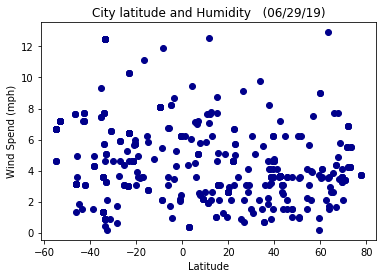

In [35]:
#Latitude and Wind_Spend 

# define x, y axis
x_axis = latitude_longitude['Latitude1']
y_axis = latitude_longitude['Wind_Spend']
now = datetime.now()
title = 'City latitude and Humidity   ('+ date_now+")"

#plot
plt.scatter(x_axis, y_axis, c='darkblue')
plt.xlabel("Latitude")
plt.ylabel("Wind Spend (mph)")
#plt.title('City latitude and Max Temperature')
plt.title(title )
#plt.grid(c='white')

plt.show()